In [1]:
import scipy.io as sio
from scipy.fft import fft
import os,glob
import math
import numpy as np
import pandas as pd

In [2]:
from mat4py import loadmat

def get_neck_files(dirname, filepatern):
    files = []
    for filename in glob.iglob(os.path.join(dirname, filepatern), recursive=True):
        files.append(filename)
    return files

def wfft_hz(filename, Hz_Lthr, Hz_Hthr):
    '"Lthr: lower threshold; Hthr: high threshold"'
    data = loadmat(filename)
    fft_data = fft(data['data'])
    NFFT = math.floor(len(data['data'])/2)+1
    fft_data = abs(fft_data[1:NFFT])
    f = data['Fs']/2 * np.linspace(0, 1, NFFT)
    idx = [i for i, e in enumerate(f) if e <= Hz_Hthr] 
    X=f[idx]
    y=fft_data[idx]
    return X, y

In [3]:
data = loadmat('../datasets/Age_A/Age_A_Female/Sub 25/25Neck_L_A_1.mat')
data

{'Fs': 44100,
 'data': [[-0.03076171875],
  [-0.031005859375],
  [-0.0338134765625],
  [-0.0299072265625],
  [-0.031585693359375],
  [-0.032806396484375],
  [-0.027587890625],
  [-0.032470703125],
  [-0.03271484375],
  [-0.03448486328125],
  [-0.02960205078125],
  [-0.034088134765625],
  [-0.02911376953125],
  [-0.0321044921875],
  [-0.032806396484375],
  [-0.0333251953125],
  [-0.030914306640625],
  [-0.03375244140625],
  [-0.03204345703125],
  [-0.030181884765625],
  [-0.035125732421875],
  [-0.030364990234375],
  [-0.0323486328125],
  [-0.032379150390625],
  [-0.03369140625],
  [-0.030670166015625],
  [-0.035003662109375],
  [-0.030242919921875],
  [-0.033843994140625],
  [-0.031463623046875],
  [-0.0355224609375],
  [-0.029388427734375],
  [-0.03253173828125],
  [-0.033477783203125],
  [-0.032470703125],
  [-0.03515625],
  [-0.032806396484375],
  [-0.035003662109375],
  [-0.03192138671875],
  [-0.038055419921875],
  [-0.0302734375],
  [-0.03363037109375],
  [-0.03399658203125],
  [

In [4]:
folder_paths = ['../datasets/Age_A/Age_A_Male/', '../datasets/Age_A/Age_A_Female/']
age_group = []
sex = []
sub = []
side = []
filename = []
pats = ['**/*Neck_R_A*.mat', '**/*Neck_L_A*.mat']

Hz_Lthr, Hz_Hthr = 0, 10
for folder_path in folder_paths:
    for dirname in glob.iglob(os.path.join(folder_path, '**/')):
        for pat in pats:
            files = get_neck_files(dirname, pat)
            for file in files:
                parts=file.split('/')
                age_group.append(parts[2])
                sex.append(parts[3][6:])
                sub.append(parts[4])
                side.append(pat[4:10])
                filename.append(file)
                
data = {
        'Age Group': age_group,
        'Sex': sex,
        'Side': side,
        'Sub': sub,
        'File': file
       }
         

In [5]:
df = pd.DataFrame(data)
df

,Age Group,Sex,Side,Sub,File
0,Age_A,Male,Neck_R,Sub 36,../datasets/Age_A/Age_A_Female/Sub 8/8Neck_L_A...
1,Age_A,Male,Neck_R,Sub 36,../datasets/Age_A/Age_A_Female/Sub 8/8Neck_L_A...
2,Age_A,Male,Neck_R,Sub 36,../datasets/Age_A/Age_A_Female/Sub 8/8Neck_L_A...
3,Age_A,Male,Neck_L,Sub 36,../datasets/Age_A/Age_A_Female/Sub 8/8Neck_L_A...
4,Age_A,Male,Neck_L,Sub 36,../datasets/Age_A/Age_A_Female/Sub 8/8Neck_L_A...
5,Age_A,Male,Neck_L,Sub 36,../datasets/Age_A/Age_A_Female/Sub 8/8Neck_L_A...
6,Age_A,Male,Neck_R,Sub 38,../datasets/Age_A/Age_A_Female/Sub 8/8Neck_L_A...
7,Age_A,Male,Neck_R,Sub 38,../datasets/Age_A/Age_A_Female/Sub 8/8Neck_L_A...
8,Age_A,Male,Neck_R,Sub 38,../datasets/Age_A/Age_A_Female/Sub 8/8Neck_L_A...
9,Age_A,Male,Neck_L,Sub 38,../datasets/Age_A/Age_A_Female/Sub 8/8Neck_L_A...


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

KeyboardInterrupt: 

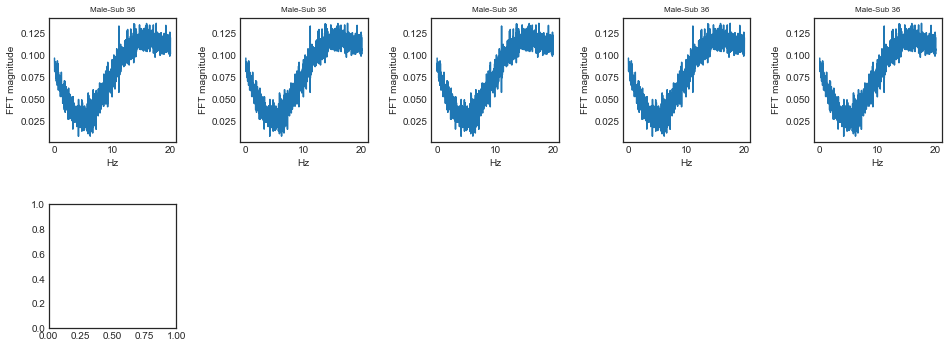

In [7]:
fig = plt.figure(figsize=(16, 16))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, row in df[:25].iterrows():
    ax = fig.add_subplot(5, 5, i+1) 
    [X,y] =  wfft_hz(row['File'], 0, 20)
    ax.plot(X, y)
    ax.set_xlabel('Hz')
    ax.set_ylabel('FFT magnitude')
    ax.set_title(row['Sex']+'-'+row['Sub'], fontdict={'fontsize': 8, 'fontweight': 'medium'})
plt.show()
    